In [102]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot  as plt

In [103]:
df=pd.read_excel(r"E:\task.xlsx")
df[:10]

,Country_Code,country,Hotel Name,Roomnights,Sale,Cost,Date
0,1,Saudi Arabia,Adagio Aparthotel Jeddah Malik Road,1033,24792,17561,"04, 2019"
1,36,USA,Aiden by Best Western @ Scottsdale North,495,14850,8910,"09, 2019"
2,71,United Arab Emirates,Al Bandar Rotana,29,638,435,"11, 2019"
3,106,Saudi Arabia,Al Eairy Furnished Apartments Tabuk 6,1097,26328,21940,"04, 2019"
4,141,Oman,Al Hail Waves Hotel,31,682,589,"01, 2019"
5,176,Saudi Arabia,Al Quba Al Thahbia Hotel Suites 2,993,19860,17874,"06, 2019"
6,491,USA,Best Western Plus McAllen Airport Hotel,1490,35760,26820,"01, 2019"
7,526,Germany,Best Western Plus Plaza Berlin Kufurstendamm,1714,39422,29138,"11, 2019"
8,561,USA,Best Western Plus Sun Canyon,981,29430,18639,"09, 2019"
9,596,Georgia,Best Western Premier Batumi,726,18150,11616,"03, 2019"


## first-get some info about the data (meta data)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_Code  2500 non-null   int64 
 1   country       2490 non-null   object
 2   Hotel Name    2500 non-null   object
 3   Roomnights    2500 non-null   int64 
 4   Sale          2500 non-null   int64 
 5   Cost          2500 non-null   int64 
 6   Date          2500 non-null   object
dtypes: int64(4), object(3)
memory usage: 136.8+ KB


In [105]:
df.isna().sum()#select the nall values and sum 

Country_Code     0
country         10
Hotel Name       0
Roomnights       0
Sale             0
Cost             0
Date             0
dtype: int64

In [106]:
#remove null values 
df.dropna(subset=['country']).isna().sum()

Country_Code    0
country         0
Hotel Name      0
Roomnights      0
Sale            0
Cost            0
Date            0
dtype: int64

In [107]:
#trans date column to date time column
df['Date']=pd.to_datetime(df['Date'])

In [108]:
##Check  date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country_Code  2500 non-null   int64         
 1   country       2490 non-null   object        
 2   Hotel Name    2500 non-null   object        
 3   Roomnights    2500 non-null   int64         
 4   Sale          2500 non-null   int64         
 5   Cost          2500 non-null   int64         
 6   Date          2500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 136.8+ KB


In [109]:
##creat net profit column
df['Net profit']=df['Sale']-df['Cost']
df[:5]

,Country_Code,country,Hotel Name,Roomnights,Sale,Cost,Date,Net profit
0,1,Saudi Arabia,Adagio Aparthotel Jeddah Malik Road,1033,24792,17561,2019-04-01,7231
1,36,USA,Aiden by Best Western @ Scottsdale North,495,14850,8910,2019-09-01,5940
2,71,United Arab Emirates,Al Bandar Rotana,29,638,435,2019-11-01,203
3,106,Saudi Arabia,Al Eairy Furnished Apartments Tabuk 6,1097,26328,21940,2019-04-01,4388
4,141,Oman,Al Hail Waves Hotel,31,682,589,2019-01-01,93


In [110]:
##summary statistics
df[['Roomnights','Sale','Cost','Net profit']].describe()

,Roomnights,Sale,Cost,Net profit
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,1000.586800,25075.458000,17555.022400,7520.435600
std,575.872115,14904.071915,10300.444627,6070.726995
min,1.000000,28.000000,16.000000,-1275.000000
25%,502.000000,12421.500000,8669.000000,2544.000000
50%,1002.500000,24649.000000,17480.000000,6068.000000
75%,1500.750000,37048.500000,25983.250000,11240.250000
max,1999.000000,59130.000000,39720.000000,28350.000000


## Hotels with highest profitability and losses.

In [111]:
#Hotels with highest profitability 
Hotels_with_highest_profitability=df.groupby(['Hotel Name','country'])[
    'Net profit'].sum().reset_index().sort_values('Net profit',ascending=False).head(10)
Hotels_with_highest_profitability

,Hotel Name,country,Net profit
2474,acora Hotel und Wohnen,Germany,28350
2086,Best Western City Hotel Moran,Czech Republic,27706
356,Aber Khamis Mushait,Saudi Arabia,27495
1366,Arthur Garden Inn Hotel,Austria,27286
1968,Bel Azur Hotel,Lebanon,27258
2031,Best Western Abbots Barton Hotel,United Kingdom,27076
229,AC Hotel Raleigh North Hills,USA,26460
756,Albergo le Due Corti,Italy,26348
971,Amber Hotel,Azerbaijan,26265
2318,Best Western Plus Cobourg Inn & Convention Centre,Canada,25998


In [112]:
#Hotels_with_lowest_profitability
Hotels_with_lowest_profitability=df[
    ['Hotel Name','country','Net profit']].sort_values('Net profit',ascending=True).head(10)
Hotels_with_lowest_profitability

,Hotel Name,country,Net profit
130,9Hotel Republique,France,-1275
67,Sheraton Moscow Sheremetyevo Airport Hotel,Russia,-1122
164,Aber City Center,Saudi Arabia,-316
85,#bunk Hotel,Turkey,-72
234,AC Hotel Guadalajara,Spain,0
827,Aloft Rogers-Bentonville,USA,0
1666,B&B H“tel Marne la Vall‚e Bussy,France,0
1655,B&B Hotel Amsterdam-Zaandam,Netherlands,0
1652,B Ocean Resort Fort Lauderdale,USA,0
1609,AYANA Resort Bali,Indonesia,0


## Countries with highest profitability and losses.

In [113]:
#Countries_with_lowest_profitability
Countries_with_lowest_profitability=df.groupby(['country'])[
         'Net profit'].sum().reset_index().sort_values('Net profit',ascending=True).head(10)
Countries_with_lowest_profitability

,country,Net profit
91,Sudan,258
13,Botswana,343
31,Finland,1035
76,Puerto Rico,1792
43,Ireland,1894
71,Paraguay,2168
101,Ukraine,2256
58,Malta,3330
54,Lithuania,3636
66,New Zealand,4385


In [114]:
#Countries_with_highest_profitability
Countries_with_highest_profitability=df.groupby(['country'])[
         'Net profit'].sum().reset_index().sort_values('Net profit',ascending=False).head(10)
Countries_with_highest_profitability

,country,Net profit
99,USA,1963852
81,Saudi Arabia,1695994
89,Spain,1515132
97,Turkey,1092326
44,Italy,1037531
32,France,928209
34,Germany,874676
102,United Arab Emirates,868775
95,Thailand,738607
36,Greece,684917


In [115]:
Countries_sales=df.groupby(['country'])[
         'Sale'].sum().reset_index().sort_values('Sale',ascending=False).head(20)
Countries_sales

,country,Sale
99,USA,6745841
81,Saudi Arabia,5542070
89,Spain,5345159
97,Turkey,3583535
44,Italy,3371709
32,France,3087260
102,United Arab Emirates,2923723
34,Germany,2887392
36,Greece,2394947
95,Thailand,2361450


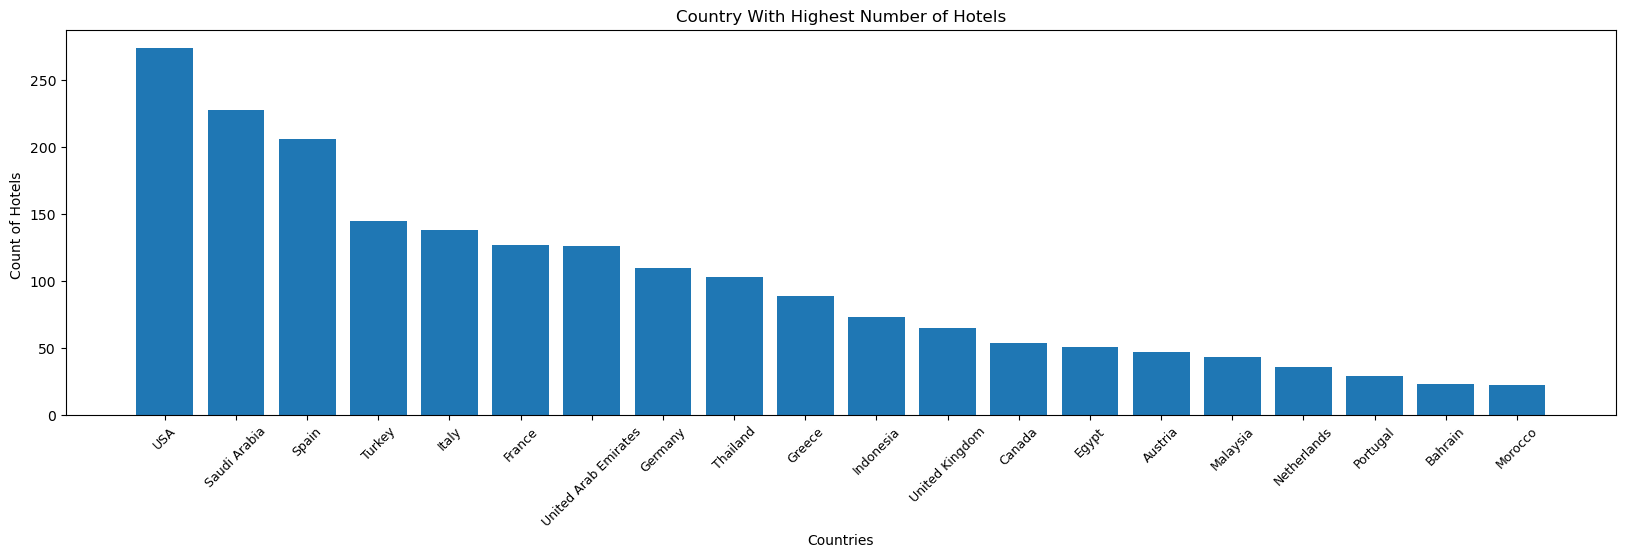

In [116]:
country_with_highest_hotels=df['country'].value_counts().head(20)
plt.figure(figsize = (20, 5))# Increase output size.
plt.bar(country_with_highest_hotels.index.astype(str),country_with_highest_hotels)
plt.title("Country With Highest Number of Hotels")
plt.xlabel('Countries')
plt.ylabel('Count of Hotels ')
plt.xticks(rotation = 45, fontsize = 9) # Rotate x-axis labels and decrease font size.

plt.show()

## Cluster the data by room nights into three categories

In [117]:
df['Roomnights'].describe()

count    2500.000000
mean     1000.586800
std       575.872115
min         1.000000
25%       502.000000
50%      1002.500000
75%      1500.750000
max      1999.000000
Name: Roomnights, dtype: float64

- Min room-night = 1  
- Max room-night =1999  
- Median room-night = 1002  
- From 1 to 666 = low   
- From 667 to 1332 = mid   
- From 1333 to 1999 = high  

In [118]:
df['demand'] = ''
for index, roomnights in enumerate(df['Roomnights']):
    if roomnights <= 666:
        df.loc[index, 'demand'] = 'low'
    elif roomnights <= 1332:
        df.loc[index, 'demand'] = 'mid'
    elif roomnights <= 1999:
        df.loc[index, 'demand'] = 'high'

df

,Country_Code,country,Hotel Name,Roomnights,Sale,Cost,Date,Net profit,demand
0,1,Saudi Arabia,Adagio Aparthotel Jeddah Malik Road,1033,24792,17561,2019-04-01,7231,mid
1,36,USA,Aiden by Best Western @ Scottsdale North,495,14850,8910,2019-09-01,5940,low
2,71,United Arab Emirates,Al Bandar Rotana,29,638,435,2019-11-01,203,low
3,106,Saudi Arabia,Al Eairy Furnished Apartments Tabuk 6,1097,26328,21940,2019-04-01,4388,mid
4,141,Oman,Al Hail Waves Hotel,31,682,589,2019-01-01,93,low
...,...,...,...,...,...,...,...,...,...
2495,87711,USA,Best Western Pony Soldier Inn & Suites,828,22356,13248,2019-12-01,9108,mid
2496,87746,Mexico,Best Western Posada Freeman,1294,38820,25880,2019-06-01,12940,mid
2497,87781,Indonesia,Best Western Premier Agung Resort Ubud,1897,37940,34146,2019-01-01,3794,high
2498,87816,Germany,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,2019-08-01,11610,high


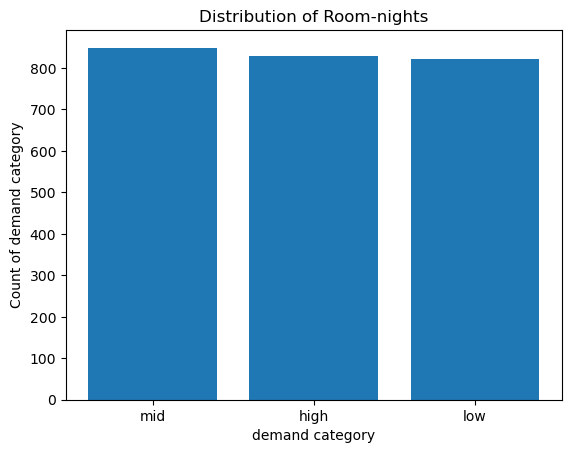

In [119]:
demand=df['demand'].value_counts()
plt.bar(demand.index.astype(str),demand)
plt.title("Distribution of Room-nights")
plt.xlabel('demand category')
plt.ylabel('Count of demand category')
plt.show()

In [120]:
df['demand'].value_counts()

mid     849
high    830
low     821
Name: demand, dtype: int64

other ways to know the Distribution of Room-nights to confirm the result

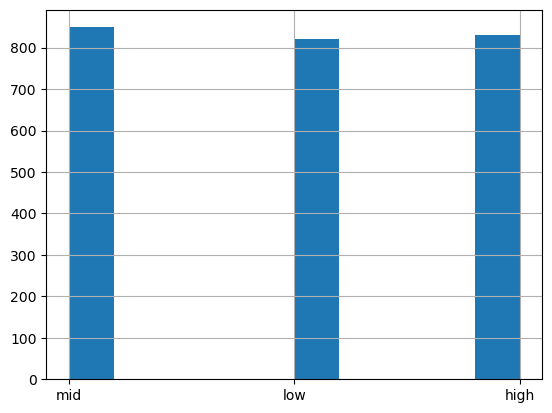

In [121]:
## other ways to know the Distribution of Room-nights
df['demand'].hist()
plt.show()

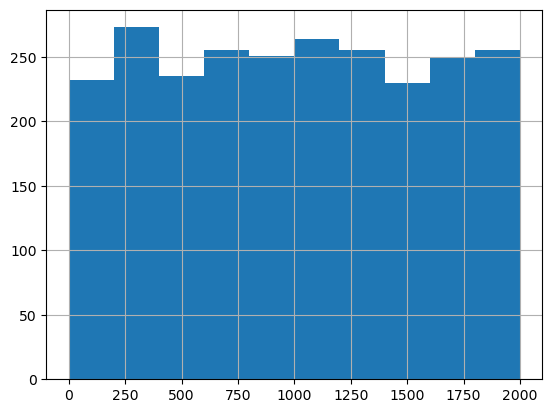

In [122]:
df['Roomnights'].hist()
plt.show()

In [132]:
#Net profit,salNet profites,cost  per room-nights categorie
df.groupby('demand')[['Cost','Sale','Net profit']].sum().sort_values('Net profit',ascending=False)

,Cost,Sale,Net profit
demand,,,
high,24331370,34736123,10404753
mid,14752218,21126181,6373963
low,4803968,6826341,2022373


## create multiple datetime columns and Grouping by time 

In [123]:
#creat month and quarter datatime
df['month'] = df['Date'].dt.strftime('%m')
df['quarter'] = df['Date'].dt.to_period('Q').dt.strftime('Q%q')
df

,Country_Code,country,Hotel Name,Roomnights,Sale,Cost,Date,Net profit,demand,month,quarter
0,1,Saudi Arabia,Adagio Aparthotel Jeddah Malik Road,1033,24792,17561,2019-04-01,7231,mid,04,Q2
1,36,USA,Aiden by Best Western @ Scottsdale North,495,14850,8910,2019-09-01,5940,low,09,Q3
2,71,United Arab Emirates,Al Bandar Rotana,29,638,435,2019-11-01,203,low,11,Q4
3,106,Saudi Arabia,Al Eairy Furnished Apartments Tabuk 6,1097,26328,21940,2019-04-01,4388,mid,04,Q2
4,141,Oman,Al Hail Waves Hotel,31,682,589,2019-01-01,93,low,01,Q1
...,...,...,...,...,...,...,...,...,...,...,...
2495,87711,USA,Best Western Pony Soldier Inn & Suites,828,22356,13248,2019-12-01,9108,mid,12,Q4
2496,87746,Mexico,Best Western Posada Freeman,1294,38820,25880,2019-06-01,12940,mid,06,Q2
2497,87781,Indonesia,Best Western Premier Agung Resort Ubud,1897,37940,34146,2019-01-01,3794,high,01,Q1
2498,87816,Germany,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,2019-08-01,11610,high,08,Q3


In [89]:
df.groupby(['quarter'])[['Cost','Sale','Net profit']].sum().sort_values('Net profit',ascending=False)

,Cost,Sale,Net profit
quarter,,,
Q4,12104072,17269169,5165097
Q1,11388720,16307033,4918313
Q3,10421754,14937768,4516014
Q2,9973010,14174675,4201665


In [82]:
df.groupby(['month'])[['Cost','Sale','Net profit']].sum().sort_values('Net profit',ascending=False)

,Cost,Sale,Net profit
month,,,
12,4519841,6496234,1976393
02,3912400,5639385,1726985
03,3666101,5367951,1701850
11,3983328,5632480,1649152
08,3521113,5157527,1636414
10,3600903,5140455,1539552
07,3483024,4983008,1499984
01,3810219,5299697,1489478
05,3388723,4857250,1468527
